# Load libraries




In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import pyreadstat
import skimpy
from prettytable import PrettyTable
from scipy.stats import pearsonr

warnings.filterwarnings("ignore")


# Load the data

In [2]:
# Import data from SPSS and clean columns
df_survey, metadata = pyreadstat.read_sav("data/2021_ACTUALIDADES_DATOS.sav")
df_survey = skimpy.clean_columns(df_survey)
df_survey.head()

,cuestionario,id,hi,mi,hf,mf,sp_1,sp_2,sp_3,sp_4,...,cs_11_a,cs_11_b,cs_11_c,cs_15_a,cs_15_b,cs_16,cs_18,edad_3,educa_3,factor
0,1.0,2.0,19.0,7.0,19.0,23.0,6.0,4.0,7.0,4.0,...,3.0,3.0,0.0,20.0,10.0,1.0,4954.0,3.0,3.0,0.551876
1,2.0,3.0,19.0,36.0,19.0,59.0,6.0,6.0,9.0,3.0,...,3.0,3.0,0.0,20.0,10.0,1.0,4954.0,3.0,1.0,1.929101
2,3.0,4.0,20.0,3.0,20.0,21.0,6.0,6.0,8.0,6.0,...,3.0,2.0,1.0,20.0,10.0,1.0,4954.0,2.0,3.0,0.581081
3,4.0,5.0,17.0,45.0,18.0,20.0,8.0,7.0,9.0,5.0,...,2.0,2.0,0.0,21.0,10.0,2.0,4956.0,3.0,2.0,1.024422
4,5.0,6.0,18.0,55.0,19.0,19.0,6.0,2.0,8.0,10.0,...,5.0,5.0,0.0,21.0,10.0,1.0,4957.0,1.0,3.0,0.495990


In [3]:
skimpy.skim(df_survey)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2003   │ │ float64     │ 123   │                                                          │
│ │ Number of columns │ 130    │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %    ┃ mean    ┃ sd     ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ cuestionario     │      0 │       0 │    1000 │    580 │      1 │    500 │  1000 │  1500 │  2000 │ ▇▇▇▇▇▇  │  │
│ │ id               │      0 │       0 │      17 │     10 │      1 │      8 │    17 │    26 │    38 │ ▇▆▆▆▅▃  │  │
│ │ hi               │      0 │       0 │      15 │      3 │      8 │     13 │    15 │    17 │    21 │ ▃▃▅▇▇▃  │  │
│ │ mi               │      0 │       0 │      29 │     17 │      0 │     14 │    29 │    43 │    59 │ ▇▇▇▇▇▆  │  │
│ │ hf               │      0 │       0 │      15 │    3.5 │      8 │     13 │    16 │    18 │    99 │    ▇    │  │
│ │ mf               │      0 │       0 │      30 │     17 │      0 │     15 │    30 │    45 │    99 │  ▇▇▇▅   │  │
│ │ sp_1             │      0 │       0 │     6.9 │    8.6 │      0 │      5 │     7 │     8 │    99 │    ▇    │  │
│ │ sp_2             │      0 │       0 │     5.7 │    9.6 │      0 │      4 │     5 │     6 │    99 │    ▇    │  │
│ │ sp_3             │      0 │       0 │     8.3 │    7.3 │      0 │      7 │     8 │     9 │    99 │    ▇    │  │
│ │ sp_4             │      0 │       0 │     5.2 │     10 │      0 │      2 │     5 │     6 │    99 │    ▇    │  │
│ │ sp_5             │      0 │       0 │     5.2 │    9.7 │      0 │      3 │     5 │     6 │    99 │    ▇    │  │
│ │ sp_6             │      0 │       0 │     5.5 │     11 │      0 │      3 │     5 │     6 │    99 │    ▇    │  │
│ │ rp_1             │      0 │       0 │     2.6 │    1.1 │      1 │      2 │     3 │     3 │     9 │   ▃▇    │  │
│ │ rp_2             │   1495 │   74.64 │       2 │      2 │      1 │      1 │     1 │     2 │     9 │ ▇    ▁  │  │
│ │ rp_3             │      0 │       0 │     8.4 │     17 │      0 │      3 │     5 │     8 │    99 │    ▇    │  │
│ │ rp_4             │      0 │       0 │      10 │     20 │      0 │      3 │     5 │     8 │    99 │    ▇    │  │
│ │ rp_5             │      0 │       0 │     1.7 │   0.73 │      1 │      1 │     2 │     2 │     9 │    ▇    │  │
│ │ rp_6             │      0 │       0 │     1.3 │   0.75 │      1 │      1 │     1 │     1 │     9 │    ▇    │  │
│ │ rp_7             │    361 │   18.02 │     1.7 │   0.62 │      1 │      1 │     2 │     2 │     9 │    ▇    │  │
│ │ cr_1             │      0 │       0 │     4.7 │   0.66 │      1 │      4 │     5 │     5 │     5 │     ▂▇  │  │
│ │ cr_2             │      0 │       0 │     4.7 │   0.66 │      1 │      5 │     5 │     5 │     5 │     ▂▇  │  │
│ │ cr_3             │      0 │       0 │     1.9 │    1.1 │      1 │      1 │     2 │     2 │     5 │ ▇▇ ▁▂▁  │  │
│ │ cr_4             │      0 │       0 │     1.7 │   0.

# Data preparation and cleaning

## Data preparation

In [4]:
# Remove some unnecesary variables
df_survey = df_survey.drop(
    columns=[
        "cs_10_br_2",
        "cs_11_c",
        "cs_15_a",
        "cs_15_b",
        "cs_16",
        "cs_18",
        "edad_3",
        "educa_3",
        "factor",
        "id",
        "cuestionario",
        "hi",
        "mi",
        "hf",
        "mf",
    ]
)

In [5]:
# Drop NA values which are code as 99, 98 or 999
df_survey.replace(
    {99: np.nan, 98: np.nan, 999: np.nan},
    inplace=True,
)


# Drop columns with more than 50% of NA values
df_tmp = df_survey.drop(
    columns=[
        "rp_3",
        "rp_4",
        "af_2_minutos",
        "af_2_horas",
        "af_4_minutos",
        "af_4_horas",
        "af_6_minutos",
        "af_6_horas",
        "af_7_minutos",
        "af_7_horas",
        "cs_2",
        "cs_4",
    ],
    axis=1,
)

for i in df_tmp.columns:
    df_survey[i] = np.where(df_survey[i] == 9, np.nan, df_survey[i])
    df_survey[i] = np.where(df_survey[i] == 8, np.nan, df_survey[i])


In [6]:
# Remove String variables are dropped because we only need the numeric ones
idx = df_survey.select_dtypes(object).columns
df_survey = df_survey.drop(idx, axis=1)

After a throughfully revision, we notices that many variables aren't related with the infection risk. They are more opinions postures about some topic. 

We will exclude all the variables starting with "sp", "rv", "cv", "va" (except va6 because is related with the vaccination status) and "nf".



## Creation of class of variable with 3 levels

This ways we can order the variables between `Low` (0), `Medium` (1) and `High` (2) risk.

In [7]:
cat_012_ord = pd.CategoricalDtype(categories=[0, 1, 2], ordered=True)

In [8]:
# This variable will contain the final set of variables to be used in the analysis
clean_cols = []

# Data cleaning

The paper links the determinants of the health with each of the variables in the dataset.  For a better understanding of the data, we will rename the variables with the name of the determinant of the health that they are related with.

![Alt text](image.png)
_Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7005090/ _

In this spirit the variable will have a prefix with the determinant of the health that they are related with:

- `sd`: Structural determinant 
- `id`: Intermediate determinant

Then, it follow the type of determinant. So for the structural determinants:

- `sd_edu`: Education
- `sd_eco`: Economic
- `sd_occ`: Occupation
- `sd_inc`: Income
- `sd_eth`: Ethnicity
- `sd_gen`: Gender
- `sd_cul`: Cultural

And for the intermediate determinants:

- `id_beh`: Behavioral
- `id_bio`: Biological
- `id_psy`: Psychosocial
- `id_mat`: Material

Finally, the variable will have a suffix with the determinant of the health that they are related with. 


 Determinantes sociales
  Determinantes estructurales
 contexto socioeconomico = de_cs
 gobernanza = de_go
 politicas (macroeconomicas, salud, sociedad)  = de_po
 normas y valores culturales = de_cu
 eduacion = de_ed
 ocupacion = de_oc
 ingresos = de_in
 genero = de_ge
 etnia = de_et
 Determinantes intermedios
 factores materiales = di_fm
 factores psicosociales = di_fp
 factores conductuales = di_fc
 factores biológicos = di_fb

## Covid-19 variable

In [9]:
df_survey = (
    df_survey.assign(
        covid19=lambda df: np.select(
            [
                (df.rp_1 == 1) | (df.rp_1 == 2),
                (df.rp_1 == 3),
                (df.rp_1 == 8) | (df.rp_1 == 9),
            ],
            [1, 0, np.nan],
            default=np.nan,
        )
    )
    .assign(covid19=lambda df: df.covid19.astype("bool"))
    .drop(["rp_1"], axis=1)
)


In [10]:
clean_cols.append("covid19")
df_survey.covid19.value_counts()

covid19
False    1464
True      539
Name: count, dtype: int64

## Self-perception of contagion risk

The variable `rp_3 is the self contagiuos perception. We will change the values to 0 (Low), 1 (Medium) and 2 (High).
 

In [11]:
df_survey = (
    df_survey.assign(
        id_beh_percep_contag=lambda df: np.select(
            [
                df.rp_3.between(0, 3),
                df.rp_3.between(4, 6),
                df.rp_3.between(7, 10),
                df.rp_3 == 99,
            ],
            [0, 1, 2, np.nan],
            default=np.nan,
        )
    )
    .assign(id_beh_percep_contag=lambda df: df.id_beh_percep_contag.astype(cat_012_ord))
    .drop(["rp_3"], axis=1)
)

In [12]:
clean_cols.append("id_beh_percep_contag")
df_survey.id_beh_percep_contag.value_counts(dropna=False)

id_beh_percep_contag
2      724
1      707
0      507
NaN     65
Name: count, dtype: int64

## Self-perception of severity of the disease

In [13]:
# Covid-19: Autopercepción gravedad
df_survey = (
    df_survey.assign(
        id_beh_percep_severity=lambda df: np.select(
            [
                df.rp_4.between(0, 3),
                df.rp_4.between(4, 6),
                df.rp_4.between(7, 10),
                df.rp_4 == 99,
            ],
            [0, 1, 2, np.nan],
            default=0,
        )
    )
    .assign(
        id_beh_percep_severity=lambda df: df.id_beh_percep_severity.astype(cat_012_ord)
    )
    .drop(["rp_4"], axis=1)
)

In [14]:
clean_cols.append("id_beh_percep_severity")
df_survey.id_beh_percep_severity.value_counts(dropna=False)

id_beh_percep_severity
2    762
0    627
1    614
Name: count, dtype: int64

## Contagion inside the household (Bubble)

In [15]:
df_survey = (
    df_survey.assign(
        id_bio_bubble_contag=lambda df: np.select(
            [
                (df.rp_5 == 1) | (df.rp_5 == 9),
                (df.rp_5 == 2),
            ],
            [1, 0],
            default=0,
        )
    )
    .assign(id_bio_bubble_contag=lambda df: df.id_bio_bubble_contag.astype("bool"))
    .drop(["rp_5"], axis=1)
)


In [16]:
clean_cols.append("id_bio_bubble_contag")
df_survey.id_bio_bubble_contag.value_counts(dropna=False)

id_bio_bubble_contag
False    1275
True      728
Name: count, dtype: int64

## Contagion outside the household (Bubble)

In [17]:
df_survey = (
    df_survey.assign(
        id_bio_outside_bubble_contag=lambda df: np.select(
            [
                (df.rp_6 == 1) | (df.rp_6 == 9),
                (df.rp_6 == 2),
            ],
            [1, 0],
            default=0,
        )
    )
    .assign(
        id_bio_outside_bubble_contag=lambda df: df.id_bio_outside_bubble_contag.astype(
            "bool"
        )
    )
    .drop(["rp_6"], axis=1)
)


In [18]:
clean_cols.append("id_bio_outside_bubble_contag")
df_survey.id_bio_outside_bubble_contag.value_counts(dropna=False)

id_bio_outside_bubble_contag
True     1518
False     485
Name: count, dtype: int64

## Aware of deaths by Covid-19

In [19]:
df_survey = (
    df_survey.assign(
        id_bio_death_covid=lambda df: np.select(
            [
                (df.rp_7 == 1) | (df.rp_7 == 9),
                (df.rp_7 == 2),
            ],
            [1, 0],
            default=0,
        )
    )
    .assign(id_bio_death_covid=lambda df: df.id_bio_death_covid.astype("bool"))
    .drop(["rp_7"], axis=1)
)

In [20]:
clean_cols.append("id_bio_death_covid")
df_survey.id_bio_death_covid.value_counts(dropna=False)

id_bio_death_covid
False    1467
True      536
Name: count, dtype: int64

## Risk behavior

In [21]:
df_survey = (
    df_survey.assign(
        cr_1=lambda df: np.where(df.cr_1 == 9, np.nan, df.cr_1),
        cr_2=lambda df: np.where(df.cr_2 == 9, np.nan, df.cr_2),
    )
    .assign(
        cr_1=lambda df: np.select(
            [
                df.cr_1.between(1, 2),
                df.cr_1.between(3, 3),
                df.cr_1.between(4, 5),
                df.cr_1 == 9,
            ],
            [2, 1, 0, np.nan],
            default=np.nan,
        ),
        cr_2=lambda df: np.select(
            [
                df.cr_2.between(1, 2),
                df.cr_2.between(3, 3),
                df.cr_2.between(4, 5),
                df.cr_2 == 9,
            ],
            [2, 1, 0, np.nan],
            default=np.nan,
        ),
    )
    .assign(id_beh_risk_personal=lambda df: df[["cr_1", "cr_2"]].median(axis=1).round())
    .assign(
        id_beh_risk_personal=lambda df: df.id_beh_risk_personal.astype(
            pd.CategoricalDtype(ordered=True)
        )
    )
    .drop(["cr_1", "cr_2"], axis=1)
)

In [22]:
clean_cols.append("id_beh_risk_personal")
df_survey.id_beh_risk_personal.value_counts()

id_beh_risk_personal
0.0    1903
1.0      82
2.0      18
Name: count, dtype: int64

## Covid risk behaviors towards other people

In [23]:
df_survey = (
    # change the value of 9 in cr_3 and cr_4 by np.nan
    df_survey.assign(
        cr_3=lambda df: np.where(df.cr_3 == 9, np.nan, df.cr_3),
        cr_4=lambda df: np.where(df.cr_4 == 9, np.nan, df.cr_4),
    )
    # change the values of cr_3 and cr_4 by 0, 1, 2
    .assign(
        cr_3=lambda df: np.select(
            [
                df.cr_3.between(1, 2),
                df.cr_3.between(3, 3),
                df.cr_3.between(5, 5),
                df.cr_3 == 9,
            ],
            [0, 1, 2, np.nan],
            default=np.nan,
        ),
        cr_4=lambda df: np.select(
            [
                df.cr_4.between(1, 2),
                df.cr_4.between(3, 3),
                df.cr_4.between(4, 5),
                df.cr_4 == 9,
            ],
            [0, 1, 2, np.nan],
            default=np.nan,
        ),
    )
    .assign(id_beh_risk_others=lambda df: df[["cr_3", "cr_4"]].median(axis=1).round())
    .assign(id_beh_risk_others=lambda df: df.id_beh_risk_others.astype(cat_012_ord))
    .drop(["cr_3", "cr_4"], axis=1)
)


In [24]:
clean_cols.append("id_beh_risk_others")
df_survey.id_beh_risk_others.value_counts()

id_beh_risk_others
0    1771
1     167
2      65
Name: count, dtype: int64

## Physical activity

The rationale behind this variable is that people who do physical activity are more likely to have a better health and therefore, a better immune system.

To create the variable we use the following assumitions: 

- If people don't do any physical activity, they are in the `High` (2) risk group.
- If people at least do moderate or light physical activity, they are in the `Medium` (1) risk group.
- If people do intense physical activity, they are in the `Low` (0) risk group.

In [25]:
df_survey = (
    df_survey.assign(
        af_1=lambda df: df.af_1.astype("float"),
        af_3=lambda df: df.af_3.astype("float"),
        af_5=lambda df: df.af_5.astype("float"),
        af_7_horas=lambda df: df.af_7_horas.astype("float"),
        af_7_minutos=lambda df: df.af_7_minutos.astype("float"),
    )
    .assign(
        af_1=lambda df: df.af_1.fillna(0),
        af_3=lambda df: df.af_3.fillna(0),
        af_5=lambda df: df.af_5.fillna(0),
        af_7_horas=lambda df: df.af_7_horas.fillna(0),
        af_7_minutos=lambda df: df.af_7_minutos.fillna(0),
    )
    # Transform each variable such as:
    # af_1, af_3, af_5 is 1 if less than 3 and 0 otherwise.
    .assign(
        id_beh_physical_act=lambda df: np.select(
            [
                (df.af_1 == 9) & (df.af_3 == 9) & (df.af_5 == 9),
                (df.af_1 == 0) & (df.af_3 == 0) & (df.af_5 == 0),
                ((df.af_3 > 0) | (df.af_5 > 0)) & (df.af_1 == 0),
                (df.af_1 > 0),
            ],
            [np.nan, 2, 1, 0],
            default=np.nan,
        )
    )
    .assign(id_beh_physical_act=lambda df: df.id_beh_physical_act.astype(cat_012_ord))
)


In [26]:
clean_cols.append("id_beh_physical_act")
df_survey.id_beh_physical_act.value_counts(dropna=False)

id_beh_physical_act
1    978
0    814
2    211
Name: count, dtype: int64

## Vaccination myths

In [27]:
# Vacunacion

# Get the list of columns starting with 'vm'
vm_columns = [col for col in df_survey.columns if col.startswith("vm")]

# Apply the assign and np.select operations to each 'vm' column
for col in vm_columns:
    df_survey[col] = np.select(
        [
            df_survey[col].between(1, 2),
            df_survey[col] == 3,
            df_survey[col].between(4, 5),
            df_survey[col] == 9,
        ],
        [0, 1, 2, np.nan],
    )

df_survey = (
    df_survey.assign(
        id_psy_vaccination_myths=lambda df: df[vm_columns].median(
            axis=1).round()
    )
    .assign(
        id_psy_vaccination_myths=lambda df: df.id_psy_vaccination_myths.astype(
            cat_012_ord
        )
    )
    .drop(columns=vm_columns)
)


In [28]:
clean_cols.append("id_psy_vaccination_myths")
df_survey.id_psy_vaccination_myths.value_counts()

id_psy_vaccination_myths
0    1869
1      77
2      57
Name: count, dtype: int64

## Vaccination status

In [29]:
df_survey = (
    df_survey.assign(
        id_bio_vaccination_status=lambda df: np.select(
            [df.va_6.between(1, 2), df.va_6 == 3, df.va_6 == 4, df.va_6 == 9],
            [0, 1, 2, np.nan],
            default=np.nan,
        )
    )
    .assign(
        id_bio_vaccination_status=lambda df: df.id_bio_vaccination_status.astype(
            cat_012_ord
        )
    )
    .drop(columns=["va_6"])
)


In [30]:
clean_cols.append("id_bio_vaccination_status")
df_survey.id_bio_vaccination_status.value_counts()

id_bio_vaccination_status
0    1837
2      97
1      61
Name: count, dtype: int64

## Anxiety disorders

In [31]:
df_survey = df_survey.assign(
    an_1=lambda df: np.select(
        [df.an_1.between(0, 1), df.an_1 == 2,
         df.an_1.between(3, 4), df.an_1 == 9],
        [0, 1, 2, np.nan],
        default=np.nan,
    ),
    an_2=lambda df: np.select(
        [df.an_2.between(0, 1), df.an_2 == 2,
         df.an_2.between(3, 4), df.an_2 == 9],
        [0, 1, 2, np.nan],
        default=np.nan,
    ),
    an_3=lambda df: np.select(
        [df.an_3.between(0, 1), df.an_3 == 2,
         df.an_3.between(3, 4), df.an_3 == 9],
        [0, 1, 2, np.nan],
        default=np.nan,
    ),
    an_4=lambda df: np.select(
        [df.an_4.between(0, 1), df.an_4 == 2,
         df.an_4.between(3, 4), df.an_4 == 9],
        [0, 1, 2, np.nan],
        default=np.nan,
    ),
    an_5=lambda df: np.select(
        [df.an_5.between(0, 1), df.an_5 == 2,
         df.an_5.between(3, 4), df.an_5 == 9],
        [0, 1, 2, np.nan],
        default=np.nan,
    ),
    an_6=lambda df: np.select(
        [df.an_6 == 1, df.an_6 == 2, df.an_6 == 3, df.an_6 == 9],
        [0, 1, 2, np.nan],
        default=np.nan,
    ),
)

df_survey = (
    df_survey.assign(
        id_psy_anxiety_sympt=lambda df: df[
            [
                "an_1",
                "an_2",
                "an_3",
                "an_4",
                "an_5",
                "an_6",
            ]
        ]
        .median(axis=1)
        .round()
    )
    .assign(id_psy_anxiety_sympt=lambda df: df.id_psy_anxiety_sympt.astype(cat_012_ord))
    .drop(
        columns=[
            "an_1",
            "an_2",
            "an_3",
            "an_4",
            "an_5",
            "an_6",
        ]
    )
)


In [32]:
clean_cols.append("id_psy_anxiety_sympt")
df_survey.id_psy_anxiety_sympt.value_counts()

id_psy_anxiety_sympt
0    1981
1      14
2       3
Name: count, dtype: int64

## Household income issues and levels

In [33]:
# Problemas con ingresos familiares
#
df_survey = (
    df_survey.assign(
        ef_1=lambda df: np.select(
            [df.ef_1 == 1, df.ef_1 == 2, df.ef_1 ==
                3, df.ef_1 == 9], [2, 1, 0, np.nan]
        ),
        ef_10=lambda df: np.select(
            [df.ef_10.between(1, 2), df.ef_10 == 3,
             df.ef_10 == 4, df.ef_10 == 9],
            [2, 1, 0, np.nan],
        ),
        sd_inc_income_level=lambda df: df[[
            "ef_1", "ef_10"]].median(axis=1).round(),
    )
    .assign(sd_inc_income_level=lambda df: df.sd_inc_income_level.astype(cat_012_ord))
    .assign(
        ef_3=lambda df: np.select(
            [df.ef_3 == 1, df.ef_3 == 2, df.ef_3 == 9], [1, 0, np.nan]
        ),
        ef_4=lambda df: np.select(
            [df.ef_4 == 1, df.ef_4 == 2, df.ef_4 == 9], [1, 0, np.nan]
        ),
        ef_5=lambda df: np.select(
            [df.ef_5 == 1, df.ef_5 == 2, df.ef_5 == 9], [1, 0, np.nan]
        ),
        ef_6=lambda df: np.select(
            [df.ef_6 == 1, df.ef_6 == 2, df.ef_6 == 9], [1, 0, np.nan]
        ),
        ef_7=lambda df: np.select(
            [df.ef_7 == 1, df.ef_7 == 2, df.ef_7 == 9], [0, 1, np.nan]
        ),
        ef_8=lambda df: np.select(
            [df.ef_8 == 1, df.ef_8 == 2, df.ef_8 == 9], [0, 1, np.nan]
        ),
        ef_9=lambda df: np.select(
            [df.ef_9 == 1, df.ef_9 == 2, df.ef_9 == 9], [0, 1, np.nan]
        ),
    )
    .assign(
        sd_inc_income_problems=lambda df: df[
            [
                "ef_3",
                "ef_4",
                "ef_5",
                "ef_6",
                "ef_7",
                "ef_8",
                "ef_9",
            ]
        ]
        .median(axis=1)
        .round()
    )
    .assign(sd_inc_income_problems=lambda df: df.sd_inc_income_problems.astype("bool"))
    .drop(
        columns=[
            "ef_1",
            "ef_3",
            "ef_4",
            "ef_5",
            "ef_6",
            "ef_7",
            "ef_8",
            "ef_9",
            "ef_10",
        ]
    )
)


In [34]:
clean_cols.append("sd_inc_income_problems")
df_survey.sd_inc_income_problems.value_counts()

sd_inc_income_problems
False    1685
True      318
Name: count, dtype: int64

In [35]:
clean_cols.append("sd_inc_income_level")
df_survey.sd_inc_income_level.value_counts()

sd_inc_income_level
2    1079
1     557
0     367
Name: count, dtype: int64

## Behavioral risk on  Holiday festivities

In [36]:
fa_columns = [col for col in df_survey.columns if col.startswith("fa")]

for col in fa_columns:
    df_survey[col] = np.select(
        [
            df_survey[col] == 1,
            df_survey[col] == 2,
            df_survey[col] == 3,
            df_survey[col] > 8,
        ],
        [2, 1, 0, np.nan],
    )

df_survey = (
    df_survey.assign(
        sd_cul_holiday_season=lambda df: df[fa_columns].median(axis=1).round()
    )
    .assign(
        sd_cul_holiday_season=lambda df: df.sd_cul_holiday_season.astype(cat_012_ord)
    )
    .drop(columns=fa_columns)
)

In [37]:
clean_cols.append("sd_cul_holiday_season")
df_survey.sd_cul_holiday_season.value_counts()

sd_cul_holiday_season
2    1708
1     209
0      86
Name: count, dtype: int64

## Gender

In [38]:
# Variables Sociodograficas
# Sexo y Edad
df_survey = (
    df_survey.rename(
        columns={
            "cs_1": "id_bio_masculine",
        }
    )
    .assign(
        id_bio_masculine=lambda df: np.select(
            [df.id_bio_masculine == 1, df.id_bio_masculine == 2], [1, 0]
        )
    )
    .assign(id_bio_masculine=lambda df: df.id_bio_masculine.astype("bool"))
)

In [39]:
clean_cols.append("id_bio_masculine")
df_survey.id_bio_masculine.value_counts()

id_bio_masculine
False    1076
True      927
Name: count, dtype: int64

## Age

In [40]:
df_survey = df_survey.rename(columns={"cs_2": "id_bio_age"}).assign(
    id_bio_age=lambda df: df.id_bio_age.astype("float")
)


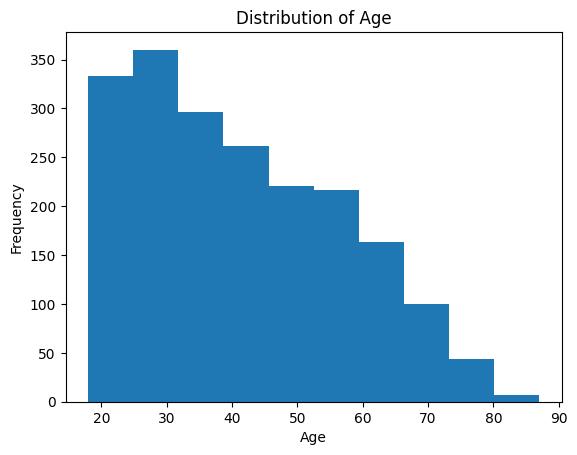

In [41]:
clean_cols.append("id_bio_age")

plt.hist(df_survey.id_bio_age)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()


## Height and weight

In [42]:
df_survey = df_survey.assign(
    cs_3=lambda df: np.where(df.cs_3 >= 98, np.nan, df.cs_3),
    cs_4=lambda df: np.where(df.cs_4 == 999, np.nan, df.cs_4),
)


df_survey = df_survey.assign(
    cs_3=lambda df: df.cs_3.astype("float"),
    cs_4=lambda df: df.cs_4.astype("float"),
).rename(columns={"cs_3": "id_bio_weight", "cs_4": "id_bio_height"})

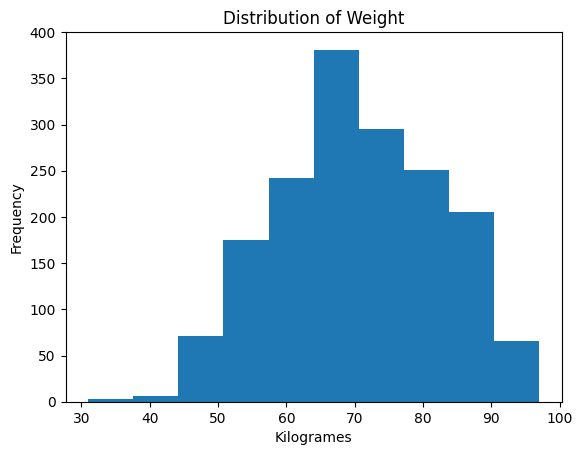

In [43]:
clean_cols.append("id_bio_weight")

counts = df_survey.id_bio_weight
plt.hist(counts)
plt.xlabel("Kilogrames")
plt.ylabel("Frequency")
plt.title("Distribution of Weight")
plt.show()


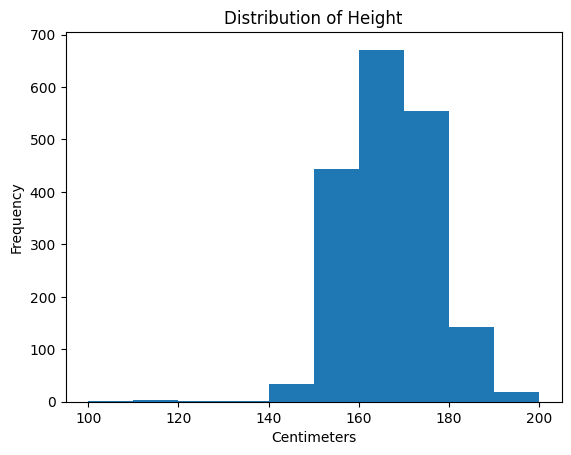

In [44]:
clean_cols.append("id_bio_height")
plt.hist(df_survey.id_bio_height)
plt.xlabel("Centimeters")
plt.ylabel("Frequency")
plt.title("Distribution of Height")
plt.show()

## Education

In [45]:
df_survey = df_survey.assign(
    sd_edu_scholarity=lambda df: np.select(
        [
            df.cs_5.between(1, 3),
            df.cs_5.between(4, 6),
            df.cs_5 == 9,
        ],
        [1, 0, np.nan],
    )
).assign(sd_edu_scholarity=lambda df: df.sd_edu_scholarity.astype("bool"))

In [46]:
clean_cols.append("sd_edu_scholarity")
df_survey.sd_edu_scholarity.value_counts()

sd_edu_scholarity
False    1199
True      804
Name: count, dtype: int64

## Occupation: Working, Studying or Retired

In [47]:
# Ocupacion
df_survey = (
    df_survey.assign(
        sd_occ_current_job=lambda df: np.select(
            [
                df.cs_6_a.isin([1, 2, 6, 7]),
                df.cs_6_a.isin([3, 4, 5]),
                df.cs_6_a == 9,
            ],
            [1, 0, np.nan],
        )
    )
    .assign(sd_occ_current_job=lambda df: df.sd_occ_current_job.astype("bool"))
    .drop(columns=["cs_6_a"])
)

In [48]:
clean_cols.append("sd_occ_current_job")
df_survey.sd_occ_current_job.value_counts()

sd_occ_current_job
True     1375
False     628
Name: count, dtype: int64

## Costa Rican origin

In [49]:
df_survey = (
    df_survey.assign(
        sd_eth_is_costa_rican=lambda df: np.select(
            [df.cs_7 == 1, df.cs_7 == 2], [True, False]
        )
    )
    .assign(sd_eth_is_costa_rican=lambda df: df.sd_eth_is_costa_rican.astype("bool"))
    .drop(columns=["cs_7"])
)

In [50]:
clean_cols.append("sd_eth_is_costa_rican")
df_survey.sd_eth_is_costa_rican.value_counts()

sd_eth_is_costa_rican
True     1766
False     237
Name: count, dtype: int64

## Comorbidities

In [51]:
# Comorbilidades
df_survey = (
    df_survey.assign(
        cs_8=lambda df: np.select(
            [df.cs_8 == 1, df.cs_8 == 2, df.cs_8 == 9], [1, 0, np.nan]
        ),
        cs_9=lambda df: np.select(
            [df.cs_9 == 1, df.cs_9 == 9, df.cs_9 == 2], [1, 1, 0]
        ),
    )
    .assign(
        id_bio_comorbidities=lambda df: df[["cs_8", "cs_9"]]
        .sum(axis=1)
        .round()
        # .mode(axis=1, dropna=True)
        #  .max(axis=1)
    )
    .assign(id_bio_comorbidities=lambda df: df.id_bio_comorbidities.astype("bool"))
    .drop(columns=["cs_8", "cs_9"])
)

In [52]:
clean_cols.append("id_bio_comorbidities")
df_survey.id_bio_comorbidities.value_counts()

id_bio_comorbidities
False    1219
True      784
Name: count, dtype: int64

## Religion affiliation

In [53]:
# Religion
df_survey = (
    df_survey.rename(columns={"cs_10_br": "sd_cul_religion"})
    .assign(
        sd_cul_religion=lambda df: np.select(
            [df.sd_cul_religion.isin([1, 7]), ~df.sd_cul_religion.isin([1, 7])],
            [1, 0],
        )
    )
    .assign(sd_cul_religion=lambda df: df.sd_cul_religion.astype("bool"))
    .drop(columns=["cs_10_a"])
)

In [54]:
clean_cols.append("sd_cul_religion")
df_survey.sd_cul_religion.value_counts()

sd_cul_religion
True     1010
False     993
Name: count, dtype: int64

## Disabilities

In [55]:
df_survey = (
    df_survey.assign(
        id_bio_disability=lambda df: np.select(
            [df.cs_10_c == 1, df.cs_10_c == 0], [1, 0]
        )
    )
    .assign(id_bio_disability=lambda df: df.id_bio_disability.astype("bool"))
    .drop(columns=["cs_10_c"])
)

In [56]:
clean_cols.append("id_bio_disability")
df_survey.id_bio_disability.value_counts()

id_bio_disability
False    1837
True      166
Name: count, dtype: int64

## Total members in household

In [57]:
df_survey = df_survey.assign(
    cs_11_a=lambda df: df.cs_11_a.astype("float"),
    cs_11_b=lambda df: df.cs_11_b.astype("float"),
).rename(
    columns={
        "cs_11_a": "id_mat_total_household_members",
        "cs_11_b": "id_mat_18_plus_household_members",
    }
)

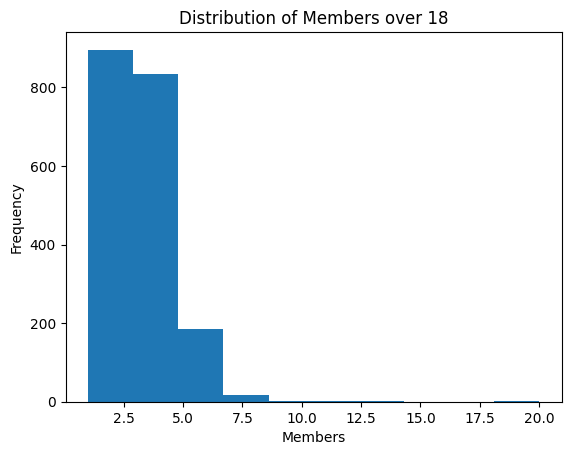

In [58]:
clean_cols.append("id_mat_18_plus_household_members")
plt.hist(df_survey.id_mat_18_plus_household_members)
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.title("Distribution of Members over 18")
plt.show()

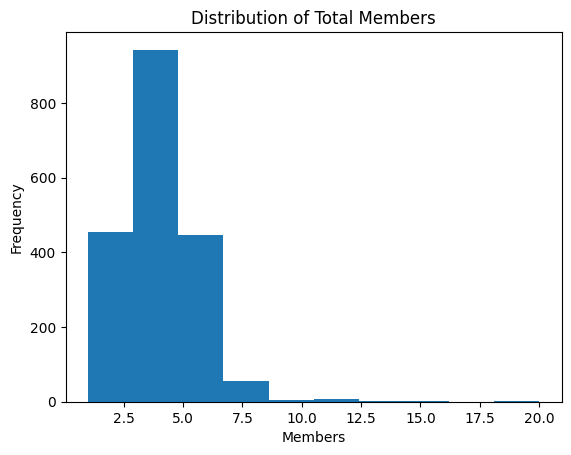

In [59]:
clean_cols.append("id_mat_total_household_members")
plt.hist(df_survey.id_mat_total_household_members)
plt.xlabel("Members")
plt.ylabel("Frequency")
plt.title("Distribution of Total Members")
plt.show()

In [60]:
clean_cols

['covid19',
 'id_beh_percep_contag',
 'id_beh_percep_severity',
 'id_bio_bubble_contag',
 'id_bio_outside_bubble_contag',
 'id_bio_death_covid',
 'id_beh_risk_personal',
 'id_beh_risk_others',
 'id_beh_physical_act',
 'id_psy_vaccination_myths',
 'id_bio_vaccination_status',
 'id_psy_anxiety_sympt',
 'sd_inc_income_problems',
 'sd_inc_income_level',
 'sd_cul_holiday_season',
 'id_bio_masculine',
 'id_bio_age',
 'id_bio_weight',
 'id_bio_height',
 'sd_edu_scholarity',
 'sd_occ_current_job',
 'sd_eth_is_costa_rican',
 'id_bio_comorbidities',
 'sd_cul_religion',
 'id_bio_disability',
 'id_mat_18_plus_household_members',
 'id_mat_total_household_members']

In [61]:
df_survey = df_survey[clean_cols]
df_survey.head()

,covid19,id_beh_percep_contag,id_beh_percep_severity,id_bio_bubble_contag,id_bio_outside_bubble_contag,id_bio_death_covid,id_beh_risk_personal,id_beh_risk_others,id_beh_physical_act,id_psy_vaccination_myths,...,id_bio_weight,id_bio_height,sd_edu_scholarity,sd_occ_current_job,sd_eth_is_costa_rican,id_bio_comorbidities,sd_cul_religion,id_bio_disability,id_mat_18_plus_household_members,id_mat_total_household_members
0,False,1,1,True,True,False,0.0,0,1,0,...,83.0,178.0,False,True,True,False,True,False,3.0,3.0
1,False,0,2,False,False,False,0.0,0,0,0,...,68.0,171.0,True,False,True,True,True,False,3.0,3.0
2,False,1,1,False,True,False,0.0,0,1,0,...,90.0,171.0,False,True,True,True,True,False,2.0,3.0
3,False,1,2,False,False,False,0.0,0,1,0,...,57.0,150.0,True,True,True,False,True,False,2.0,2.0
4,False,1,0,False,True,False,0.0,0,1,0,...,78.0,180.0,False,True,True,True,False,False,5.0,5.0


In [62]:
df_survey.to_pickle(path="data/df_survey.pkl")